In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}' .format(x_train.shape))
print('Testing Images: {}' .format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


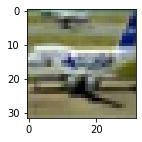

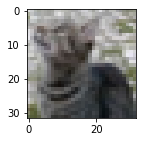

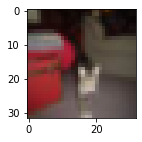

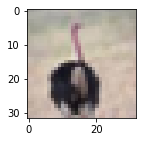

In [ ]:
for i in range(332,336):
  plt.subplots(figsize=(2,2))
  img= x_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test=x_test/255
n_classes = 10

print("shape before one hot-encoding:" , y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("shape after one hot-encoding:" , y_train.shape)



shape before one hot-encoding: (50000, 1)
shape after one hot-encoding: (50000, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

model=Sequential()
model.add(Conv2D(50 ,kernel_size=(3,3), strides=(1,1),input_shape=(32,  32, 3), padding='same', activation = 'relu'))

model.add(Conv2D(75 ,kernel_size=(3,3), strides=(1,1), padding='same',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3), strides=(1,1), padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(x_train,Y_train,batch_size=128,epochs=10,validation_data=(x_test,Y_test)) 





Epoch 1/10
391/391 [==============================] - 534s 1s/step - loss: 1.5891 - accuracy: 0.4158 - val_loss: 1.1224 - val_accuracy: 0.5947
Epoch 2/10
391/391 [==============================] - 528s 1s/step - loss: 1.1004 - accuracy: 0.6112 - val_loss: 0.9195 - val_accuracy: 0.6838
Epoch 3/10
391/391 [==============================] - 528s 1s/step - loss: 0.9165 - accuracy: 0.6801 - val_loss: 0.8027 - val_accuracy: 0.7285
Epoch 4/10
391/391 [==============================] - 527s 1s/step - loss: 0.8098 - accuracy: 0.7180 - val_loss: 0.7392 - val_accuracy: 0.7462
Epoch 5/10
391/391 [==============================] - 528s 1s/step - loss: 0.7309 - accuracy: 0.7428 - val_loss: 0.7269 - val_accuracy: 0.7486
Epoch 6/10
391/391 [==============================] - 525s 1s/step - loss: 0.6631 - accuracy: 0.7665 - val_loss: 0.7077 - val_accuracy: 0.7585
Epoch 7/10
391/391 [==============================] - 527s 1s/step - loss: 0.6148 - accuracy: 0.7855 - val_loss: 0.6765 - val_accuracy: 0.7680

In [ ]:
classes = range(0,10)
names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes,names))

batch=x_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

predictions = model.predict(batch,verbose =1)

1/1 [==============================] - 0s 76ms/step


In [ ]:
print(predictions)

[[4.32203466e-04 1.64318444e-05 5.28127812e-02 4.39495519e-02
  5.86341858e-01 1.22634552e-01 1.10649620e-03 1.92144752e-01
  4.16439929e-04 1.44961494e-04]
 [1.32942630e-04 6.47848865e-05 3.74159180e-02 6.28610477e-02
  1.54885650e-01 4.31639850e-01 6.34472491e-03 3.06270480e-01
  1.85818397e-04 1.98766880e-04]
 [2.57488107e-04 9.81298726e-05 1.65936034e-02 3.11219273e-03
  8.83101544e-04 1.34402234e-03 9.77508545e-01 9.54682400e-05
  5.67889365e-05 5.06995093e-05]
 [3.05668567e-04 4.51309206e-05 8.23922642e-03 8.01606297e-01
  4.44126874e-02 5.98796010e-02 8.13882351e-02 3.53431189e-03
  9.73799251e-05 4.91421379e-04]
 [4.17451957e-07 9.99082088e-01 5.64069291e-10 1.36117195e-09
  1.47631490e-10 1.25453439e-10 3.75956377e-09 1.58799279e-10
  6.83463895e-06 9.10541159e-04]
 [1.16830691e-07 9.99861360e-01 5.96268190e-09 3.57138791e-10
  1.35929159e-11 7.00116284e-11 1.26289219e-08 5.33881273e-12
  3.21690368e-06 1.35254901e-04]
 [1.46813303e-01 1.36777596e-03 3.23862061e-02 4.09535885e

In [ ]:
for image in predictions:
  print(np.sum(image))


1.0
1.0
1.0000001
0.99999994
0.9999999
0.99999994
0.99999994
0.9999999
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


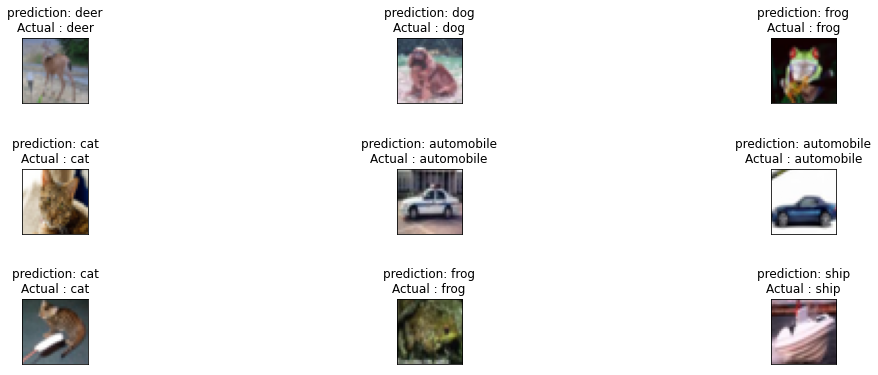

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='prediction: {}\nActual : {}' .format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
      # print(i,/img)
  axs[i].imshow(img)

plt.show()